## Time to get your hands dirty! Cloning quasars

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.
The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

![](https://classic.sdss.org/includes/sideimages/sdss_pie2.jpg)

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data

Download the SDSS quasar data

In [1]:
from astroML.datasets import fetch_dr7_quasar
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,5]

Let's first have a look at the data

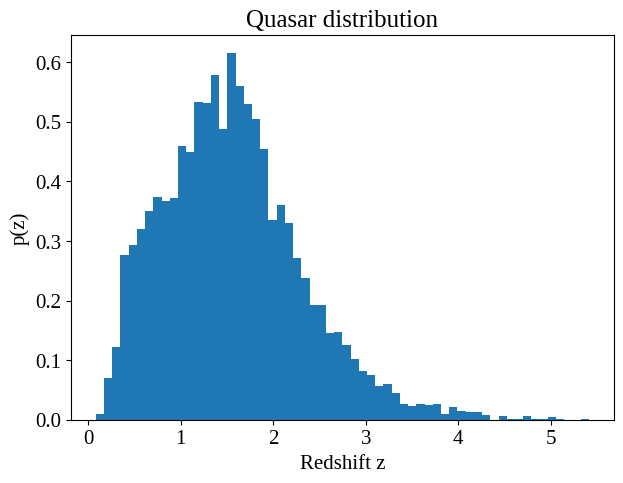

The redshift goes from  0.0802  to  5.4135


In [3]:
N_bins=60

counts, bins, patches = plt.hist(z, density=True, bins=N_bins)
plt.xlabel('Redshift z')
plt.ylabel('p(z)')
plt.title('Quasar distribution')
plt.show()

z_max=max(z)
z_min=min(z)
print("The redshift goes from ", z_min, " to ", z_max)

y_max=max(counts)

### Rejection sampling

Generate the function $h$ from the histogram of the distribution, and then generate the new points by appling the rejection sample

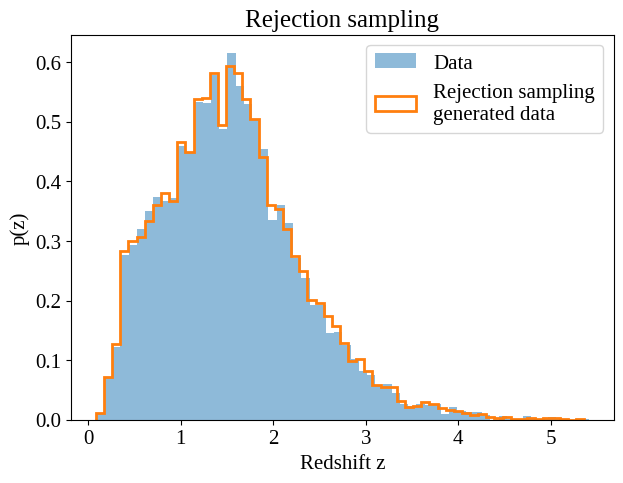

In [4]:
h = scipy.stats.rv_histogram((counts,bins))  

N=100000

#generate random points that cover all the distribution, and apply the rejection sample
x = np.random.uniform(0,z_max,N)
y = np.random.uniform(0,y_max,N)

good_x = x[y<h.pdf(x)]

#plot the cloned distribution
plt.hist(z, density=True, bins=N_bins, alpha=0.5, label='Data')
plt.hist(good_x, density=True, bins=N_bins, histtype='step', label='Rejection sampling\ngenerated data', lw=2)
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('p(z)')
plt.title('Rejection sampling')
plt.show()

### Inverse transform

Consider first the cumuative density function of the histogram, and the invert it

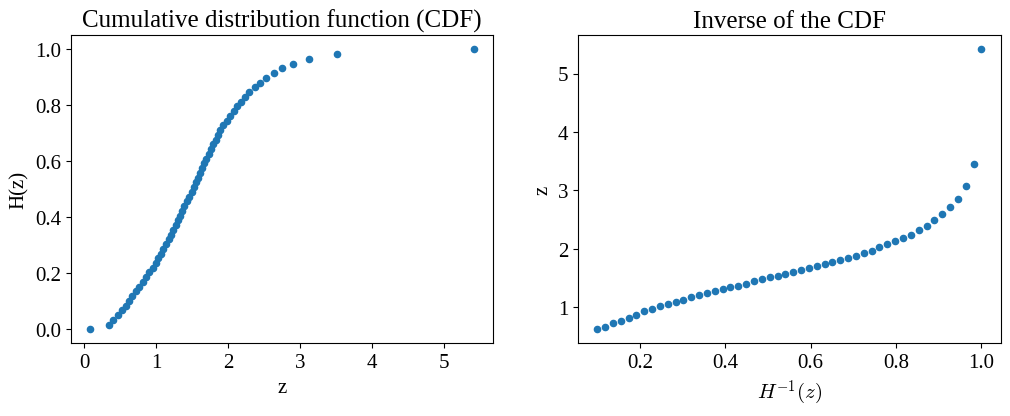

In [5]:
index = np.linspace(0, len(z)-1, N_bins, dtype=int)

#take the cdf of the histogram
z.sort()
Px_cuml = np.linspace(0,1,len(z))

#interpolate now the inverse cumulative distribution
H_inv = scipy.interpolate.interp1d(Px_cuml, z)
xgrid = np.linspace(0.1, 1, 50)


fig = plt.figure(figsize=(12, 4))

ax=fig.add_subplot(121)
plt.scatter(z[index], Px_cuml[index], s=20)
plt.xlabel('z')
plt.ylabel('H(z)')
plt.title('Cumulative distribution function (CDF)')

ax=fig.add_subplot(122)
plt.scatter(xgrid, H_inv(xgrid), s=20)
plt.ylabel('z')
plt.xlabel(r'$H^{-1}(z)$')
plt.title('Inverse of the CDF')

plt.show()

Generate now N new points and compute the value of the inverse CDF in these points. This is the inverse transform sampling

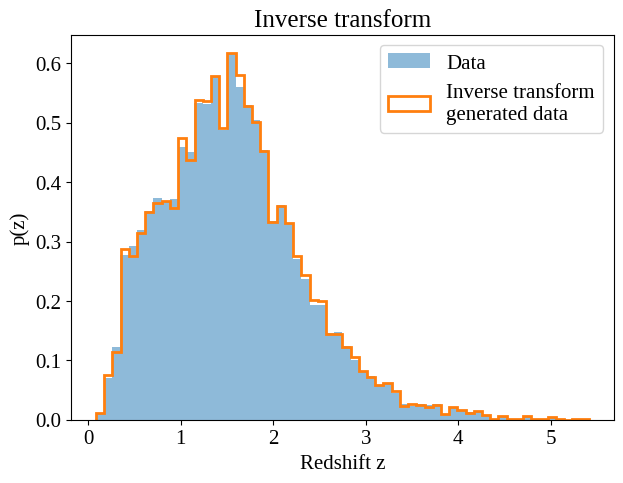

In [6]:
#generate N random number from a uniform distribution between 0 and 1
u = np.random.uniform(0,1,N)

#and put into the inverse function
cloned_distr = H_inv(u)

#plot the cloned distribution
plt.hist(z, density=True, bins=N_bins, alpha=0.5, label='Data')
plt.hist(cloned_distr, density=True, bins=N_bins, histtype='step', label='Inverse transform\ngenerated data', 
         lw=2)
plt.legend()
plt.xlabel('Redshift z')
plt.ylabel('p(z)')
plt.title('Inverse transform')
plt.show()

Compare now the three distribution, the original one and the two cloned

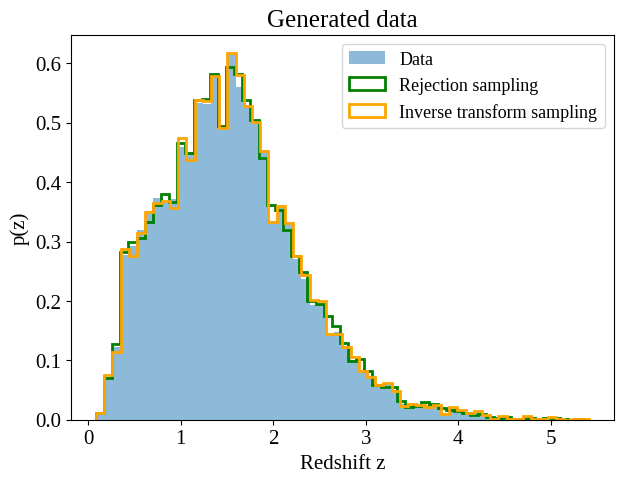

In [7]:
#compare the three results
plt.hist(z, bins=N_bins, density=True, alpha=0.5, label='Data');
plt.hist(good_x, bins=N_bins, histtype='step', density=True, label='Rejection sampling', lw=2, color='green')
plt.hist(cloned_distr, bins=N_bins, histtype='step', density=True, label='Inverse transform sampling', lw=2, 
         color='orange')
plt.legend(fontsize=13)
plt.xlabel('Redshift z')
plt.ylabel('p(z)')
plt.title('Generated data')
plt.show()

### KS test

Use the Kolmogorov-Smirnov (KS) Test to verify if the cloned distribution are equivalent or not to the original one.

In [12]:
test_1=scipy.stats.ks_2samp(z, good_x)
test_2=scipy.stats.ks_2samp(z, cloned_distr)

print("KS test for rejection sampling:\n ",test_1)

print("KS test for inverse transform sampling:\n ",test_2)

KS test for rejection sampling:
  KstestResult(statistic=0.005772508065320814, pvalue=0.9626819347003701)
KS test for inverse transform sampling:
  KstestResult(statistic=0.004410000000000025, pvalue=0.9941397532812303)


Well, the two cloned distribution are very similar to the starting one.

### Theorethical distribution of quasars 

In [33]:
import astropy
astropy.cosmology.Planck15

FlatLambdaCDM(name="Planck15", H0=67.74 km / (Mpc s), Om0=0.3075, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

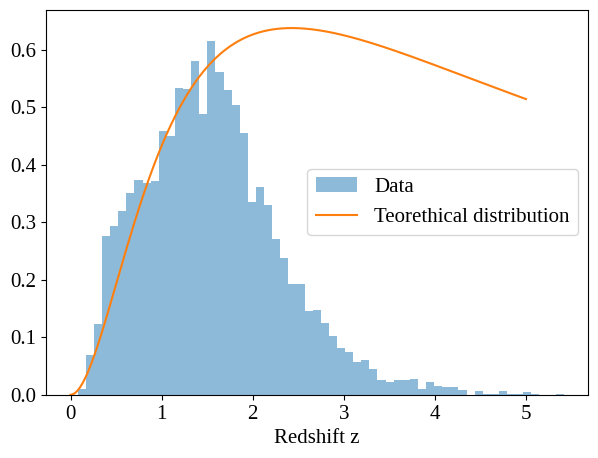

In [34]:
def quasar_distribution(z):
    return 4 * np.pi * astropy.cosmology.Planck15.differential_comoving_volume(z)

z_grid=np.linspace(0,5,1000)
plt.hist(z, bins=N_bins, density=True, alpha=0.5, label='Data')
plt.plot(z_grid, 1.2*10e-13 * quasar_distribution(z_grid), label='Teorethical distribution')
plt.legend()
plt.xlabel('Redshift z')
plt.show()